#### <i> Bankruptcy Prediction for US Businesses Leveraging Machine Learning for Financial Stability </i> 
#### <i> Dataset Link ---> https://www.kaggle.com/datasets/sovairesearch/bankruptcy </i>
#### <i> Import Library Files </i>

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Import the warnings library
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns


#### <i> Load The Dataset </i>

In [2]:
df = pd.read_csv("bankruptcy.csv")
df

,Unnamed: 0,ticker,date,probability_light,probability_convolution,probability_rocket,probability_encoder,probability_fundamental,sans_market,probability,volatility,multiplier,version
0,0,A,1999-11-30,1.48569,0.742845,1.48569,1.485690,1.23629,-0.24940,1.299979,0.00000,2.331466,20240901
1,1,A,1999-12-31,1.48142,0.740710,1.48142,1.481420,1.23629,-0.24513,1.296243,0.00000,2.892753,20240901
2,2,A,2000-01-31,1.48925,0.744625,1.48925,1.489250,1.23675,-0.25250,1.303094,0.00000,2.111402,20240901
3,3,A,2000-02-29,1.48565,0.742825,1.48565,1.485650,1.23675,-0.24890,1.299944,0.00000,2.290044,20240901
4,4,A,2000-03-31,1.47943,0.739715,1.47943,1.479430,1.23600,-0.24342,1.294501,0.00000,2.020291,20240901
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692457,1722757,ZZ,2012-11-30,2.37042,0.786395,1.40324,1.782150,1.89357,-0.47685,1.585551,0.42169,0.192198,20240901
1692458,1722758,ZZ,2012-12-31,2.33858,1.221295,2.10401,2.295060,1.89357,-0.44501,1.989736,0.14161,0.237075,20240901
1692459,1722759,ZZ,2013-01-31,2.47315,1.491575,2.12190,2.526067,1.89357,-0.57958,2.153173,0.35359,0.253019,20240901
1692460,1722760,ZZ,2013-02-28,2.26522,1.310605,2.93124,2.605890,1.89357,-0.37165,2.278239,0.27212,0.289739,20240901


#### <i> Dataset Overview </i>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692462 entries, 0 to 1692461
Data columns (total 13 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Unnamed: 0               int64  
 1   ticker                   object 
 2   date                     object 
 3   probability_light        float64
 4   probability_convolution  float64
 5   probability_rocket       float64
 6   probability_encoder      float64
 7   probability_fundamental  float64
 8   sans_market              float64
 9   probability              float64
 10  volatility               float64
 11  multiplier               float64
 12  version                  int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 167.9+ MB


In [4]:
df.describe()

,Unnamed: 0,probability_light,probability_convolution,probability_rocket,probability_encoder,probability_fundamental,sans_market,probability,volatility,multiplier,version
count,1.692462e+06,1.692462e+06,1.692462e+06,1.692462e+06,1.692462e+06,1.692462e+06,1.692462e+06,1.692462e+06,1.692462e+06,1.692462e+06,1692462.0
mean,8.614176e+05,3.582041e+00,1.376977e+00,3.437322e+00,3.461674e+00,2.981971e+00,-6.000702e-01,2.964503e+00,1.521056e+00,1.854366e+00,20240901.0
std,4.972559e+05,1.045158e+01,3.330802e+00,9.605880e+00,1.002184e+01,8.796078e+00,7.804906e+00,7.880704e+00,3.856422e+00,1.363052e+00,0.0
min,0.000000e+00,1.458790e+00,0.000000e+00,1.900000e-04,4.868633e-01,1.233800e+00,-9.661207e+01,4.867296e-01,0.000000e+00,7.247955e-02,20240901.0
25%,4.307722e+05,1.476460e+00,2.211550e-01,1.783200e-01,1.432030e+00,1.256320e+00,-2.447700e-01,8.417000e-01,3.885125e-01,7.496679e-01,20240901.0
50%,8.613255e+05,1.516990e+00,6.710700e-01,8.291000e-01,1.474680e+00,1.304270e+00,-2.192500e-01,1.172697e+00,6.517600e-01,1.428572e+00,20240901.0
75%,1.292108e+06,1.726910e+00,1.050075e+00,1.888340e+00,1.648530e+00,1.525320e+00,-1.738300e-01,1.666251e+00,7.844500e-01,2.775758e+00,20240901.0
max,1.722761e+06,9.838261e+01,5.000000e+01,9.891709e+01,9.793279e+01,9.946382e+01,9.372175e+01,8.569119e+01,5.010164e+01,5.273831e+01,20240901.0


#### <i> Data Visulization And Analysis </i>

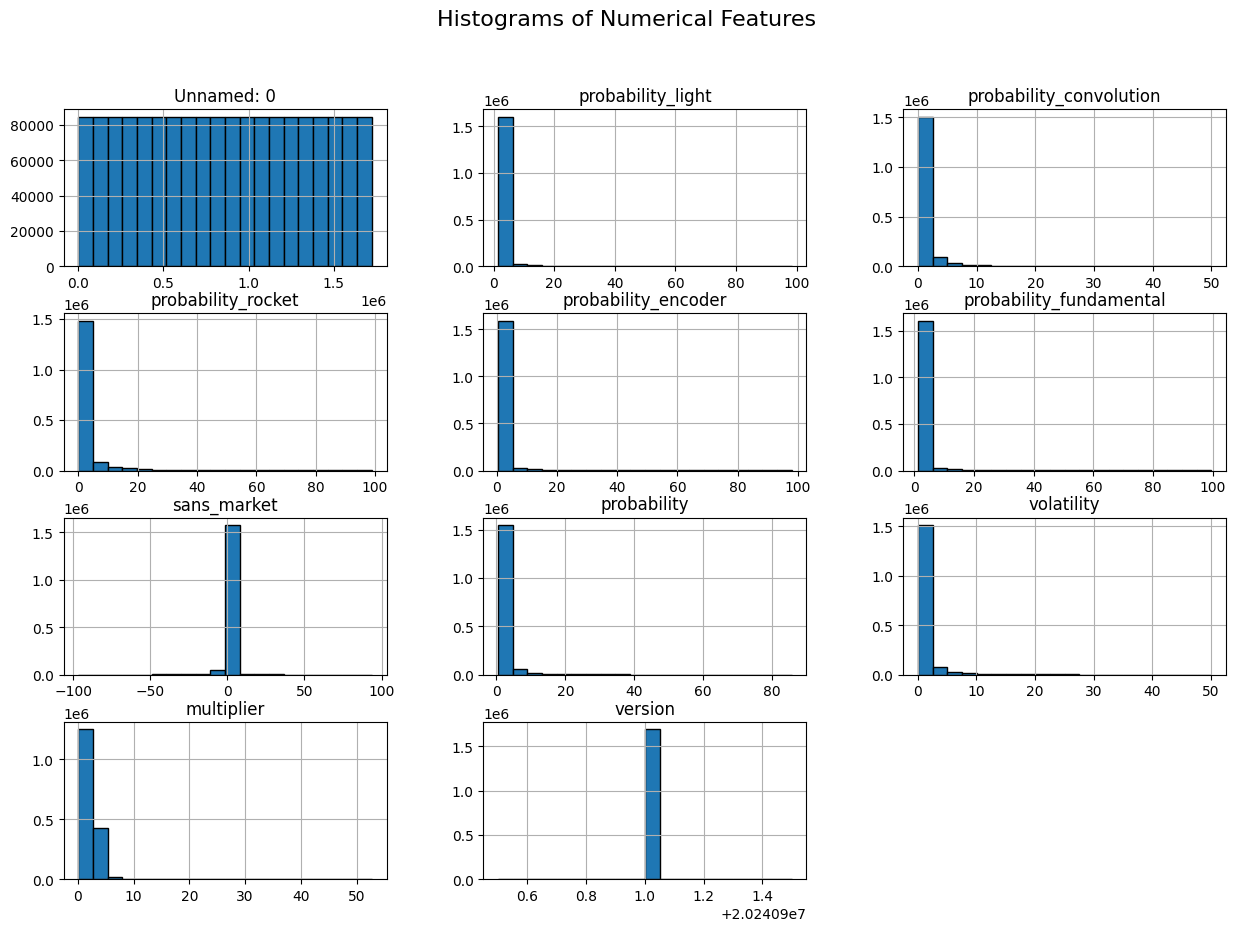

In [5]:
# Plot histograms
df.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.show()


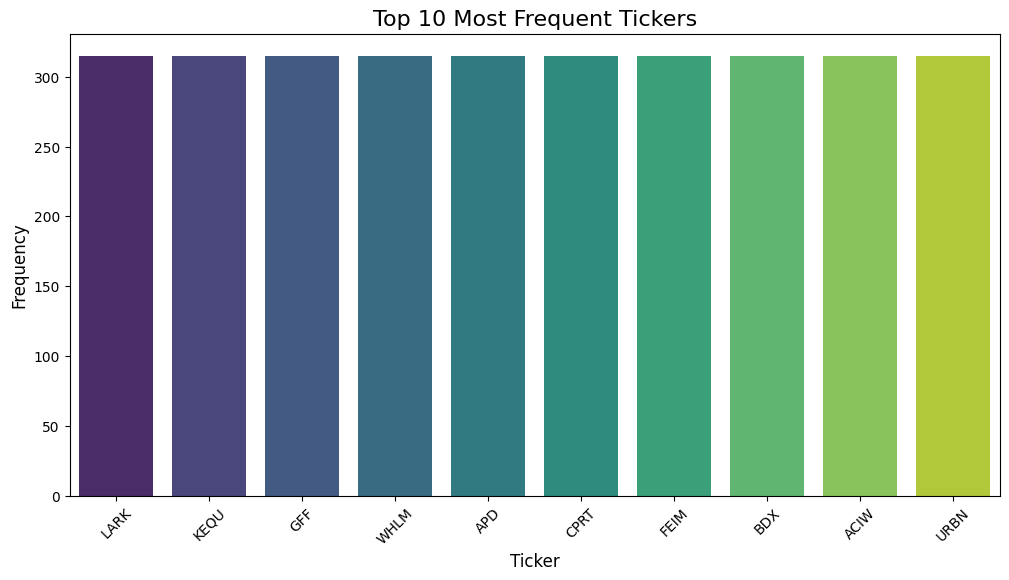

In [6]:
# Bar plot for tickers
plt.figure(figsize=(12, 6))
ticker_counts = df['ticker'].value_counts()
sns.barplot(x=ticker_counts.index[:10], y=ticker_counts.values[:10], palette='viridis')
plt.title('Top 10 Most Frequent Tickers', fontsize=16)
plt.xlabel('Ticker', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.show()


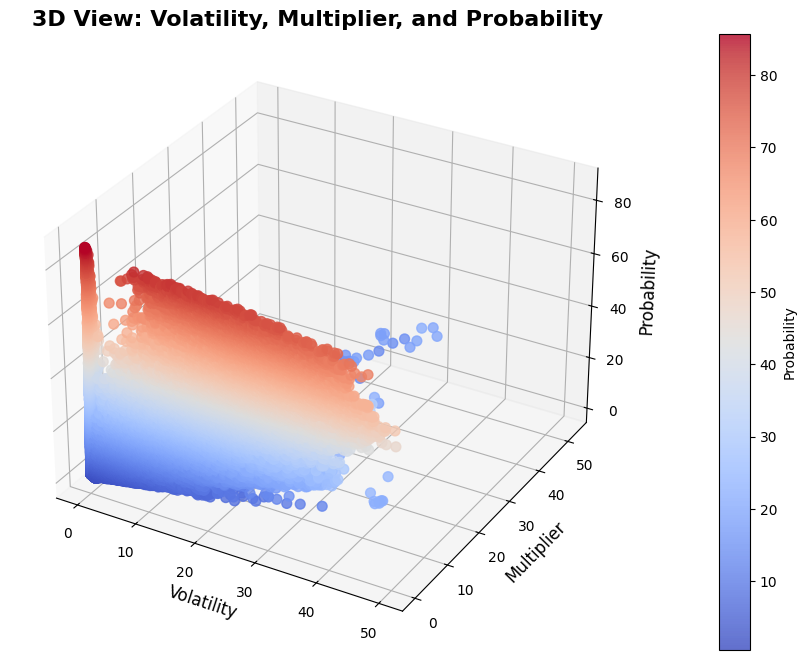

In [12]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(
    df['volatility'], df['multiplier'], df['probability'], 
    c=df['probability'], cmap='coolwarm', s=50, alpha=0.8
)

ax.set_title('3D View: Volatility, Multiplier, and Probability', fontsize=16, fontweight='bold')
ax.set_xlabel('Volatility', fontsize=12)
ax.set_ylabel('Multiplier', fontsize=12)
ax.set_zlabel('Probability', fontsize=12)
fig.colorbar(sc, label='Probability', pad=0.1)
plt.show()

# Insights: Discover clusters or outliers based on the interaction of these variables.


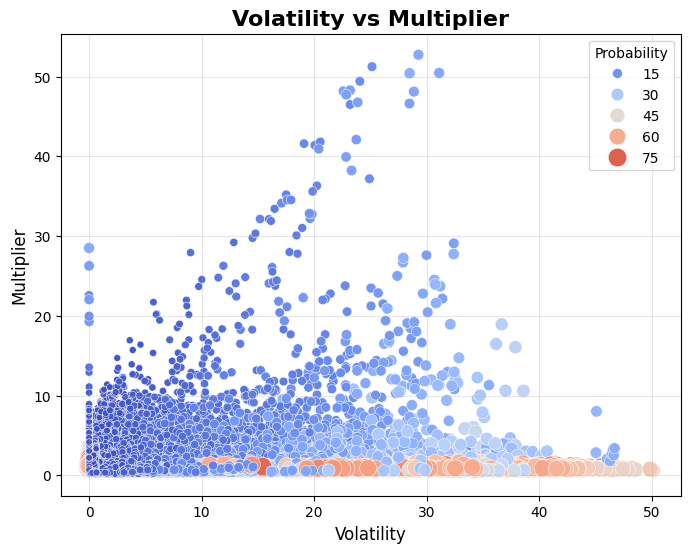

In [15]:
# Scatter plot: Volatility vs Multiplier
plt.figure(figsize=(8, 6))
sns.scatterplot(x='volatility', y='multiplier', data=df, hue='probability', palette='coolwarm', size='probability', sizes=(20, 200))
plt.title('Volatility vs Multiplier', fontsize=16, fontweight='bold')
plt.xlabel('Volatility', fontsize=12)
plt.ylabel('Multiplier', fontsize=12)
plt.legend(title='Probability', loc='upper right')
plt.grid(alpha=0.3)
plt.show()

# Insights: High volatility correlates with higher multipliers, indicating potential market risks.


#### <i> Data Preprocessing </i>

In [7]:
# Rename 'Unnamed: 0' to a meaningful name if necessary
df.rename(columns={'Unnamed: 0': 'index'}, inplace=True)

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Drop rows with invalid or missing dates
df = df.dropna(subset=['date'])

# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(include=['object']).columns.tolist()
print(f"Non-numeric columns: {non_numeric_columns}")

# Handle non-numeric columns
# If the 'ticker' column is a categorical feature, encode it
if 'ticker' in df.columns:
    label_encoder = LabelEncoder()
    df['ticker'] = label_encoder.fit_transform(df['ticker'])

# Handle missing values (drop or impute)
df.fillna(df.median(), inplace=True)  # Impute missing numeric values with the median

# Create a binary target column 'bankrupt' based on 'probability' threshold
threshold = 0.5  # Define a threshold for bankruptcy
df['bankrupt'] = df['probability'].apply(lambda x: 1 if x > threshold else 0)

# Drop unnecessary columns
columns_to_drop = ['index', 'version', 'date']  # Drop columns not needed for modeling
df = df.drop(columns=columns_to_drop, axis=1)

# Separate features and target
X = df.drop(columns=['bankrupt'], axis=1)  # Features
y = df['bankrupt']  # Target

# Convert all features to numeric if not already
X = X.apply(pd.to_numeric, errors='coerce')

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Print shapes for verification
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Non-numeric columns: ['ticker']
X_train shape: (1353969, 10)
X_test shape: (338493, 10)
y_train shape: (1353969,)
y_test shape: (338493,)


#### <i> Modeling </i>
#### <i> Logistic Regression </i>

In [8]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate the model
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic))
print("Classification Report:\n", classification_report(y_test, y_pred_logistic))


Logistic Regression Performance:
Accuracy: 0.9997341156242522
Confusion Matrix:
 [[     0     90]
 [     0 338403]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        90
           1       1.00      1.00      1.00    338403

    accuracy                           1.00    338493
   macro avg       0.50      0.50      0.50    338493
weighted avg       1.00      1.00      1.00    338493



#### <i> Random Foresrt </i>

In [9]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the model
print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Performance:
Accuracy: 1.0
Confusion Matrix:
 [[    90      0]
 [     0 338403]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00    338403

    accuracy                           1.00    338493
   macro avg       1.00      1.00      1.00    338493
weighted avg       1.00      1.00      1.00    338493



#### <i> XGBClassifier </i>

In [10]:
# Import necessary libraries
from xgboost import XGBClassifier

# Initialize and train the XGBoost model
xgboost_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgboost_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgboost_model.predict(X_test)

# Evaluate the model
print("XGBoost Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Performance:
Accuracy: 0.9999852286457918
Confusion Matrix:
 [[    88      2]
 [     3 338400]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97        90
           1       1.00      1.00      1.00    338403

    accuracy                           1.00    338493
   macro avg       0.98      0.99      0.99    338493
weighted avg       1.00      1.00      1.00    338493



#### <i> COmparison Of All Models </i>


Model Comparison Table:
                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.999734   0.999734  1.000000  0.999867
1        Random Forest  1.000000   1.000000  1.000000  1.000000
2              XGBoost  0.999985   0.999994  0.999991  0.999993


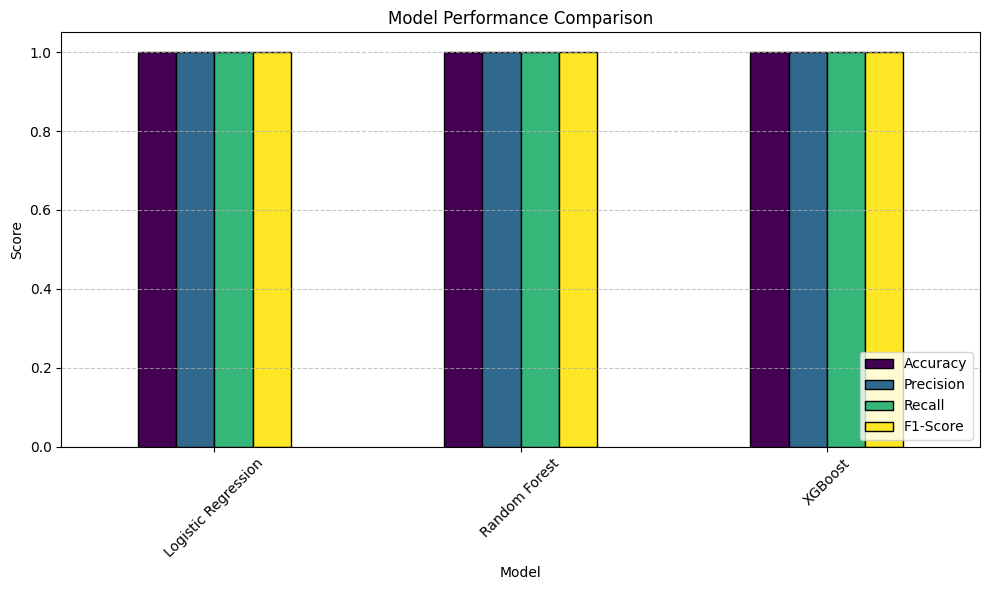

In [11]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define a function to evaluate and return metrics
def evaluate_model(model_name, y_true, y_pred):
    metrics = {
        "Model": model_name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-Score": f1_score(y_true, y_pred)
    }
    return metrics

# Collect metrics for each model
logistic_metrics = evaluate_model("Logistic Regression", y_test, y_pred_logistic)
random_forest_metrics = evaluate_model("Random Forest", y_test, y_pred_rf)
xgboost_metrics = evaluate_model("XGBoost", y_test, y_pred_xgb)

# Create a DataFrame for easy comparison
metrics_df = pd.DataFrame([logistic_metrics, random_forest_metrics, xgboost_metrics])

# Print the comparison table
print("\nModel Comparison Table:")
print(metrics_df)

# Visualize the metrics using a bar chart
metrics_to_plot = ["Accuracy", "Precision", "Recall", "F1-Score"]
metrics_df.set_index("Model", inplace=True)

metrics_df[metrics_to_plot].plot(kind="bar", figsize=(10, 6), colormap="viridis", edgecolor="black")
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()
